In [86]:
import json
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

In [87]:
with open('dtypes.json', 'r') as jsonfile:
    dtyp = json.load(jsonfile)

In [88]:
dtyp

{'id': 'float',
 'flag_tsunami': 'str',
 'year': 'float',
 'month': 'float',
 'day': 'float',
 'hour': 'float',
 'minute': 'float',
 'second': 'float',
 'focal_depth': 'float',
 'eq_primary': 'float',
 'eq_mag_mw': 'float',
 'eq_mag_ms': 'float',
 'eq_mag_mb': 'float',
 'intensity': 'float',
 'country': 'str',
 'state': 'str',
 'location_name': 'str',
 'latitude': 'float',
 'longitude': 'float',
 'region_code': 'str',
 'injuries': 'float',
 'injuries_description': 'str',
 'damage_millions_dollars': 'float',
 'damage_description': 'str',
 'total_injuries': 'float',
 'total_injuries_description': 'str',
 'total_damage_millions_dollars': 'float',
 'total_damage_description': 'str'}

In [89]:
data = pd.read_csv('Datasets\earthquake_data.csv', dtype = dtyp)

In [90]:
data

id flag_tsunami    year  month   day  hour  minute  second  \
0       338.0           No  1048.0    NaN   NaN   NaN     NaN     NaN   
1       771.0          Tsu  1580.0    4.0   6.0   NaN     NaN     NaN   
2      7889.0          Tsu  1757.0    7.0  15.0   NaN     NaN     NaN   
3      6697.0          Tsu  1500.0    NaN   NaN   NaN     NaN     NaN   
4      6013.0          Tsu  1668.0    4.0  13.0   NaN     NaN     NaN   
...       ...          ...     ...    ...   ...   ...     ...     ...   
6067   5360.0          Tsu  1993.0    8.0   8.0   8.0    34.0    24.9   
6068   5009.0           No  1983.0   12.0  22.0   1.0     2.0     2.4   
6069  10307.0           No  2018.0    2.0  25.0  17.0    44.0    43.0   
6070   5498.0           No  1998.0    7.0   9.0   5.0    19.0     7.3   
6071   5459.0           No  1997.0    4.0  22.0   9.0    31.0    23.2   

      focal_depth  eq_primary  ...  longitude  region_code  injuries  \
0             NaN         NaN  ...        NaN          120       NaN   
1            33.0         6.2  ...      1.309          120       NaN   
2             NaN         NaN  ...     -6.320          120       NaN   
3             NaN         NaN  ...        NaN          150       NaN   
4             NaN         NaN  ...    -71.050          150       NaN   
...           ...         ...  ...        ...          ...       ...   
6067         59.0         7.8  ...    144.801          170      48.0   
6068         26.0         6.4  ...    151.868          170       NaN   
6069         23.0         7.5  ...    142.768          170     300.0   
6070         10.0         6.2  ...    -28.626          130     100.0   
6071          5.0         6.7  ...    -60.892           90       2.0   

      injuries_description damage_millions_dollars damage_description  \
0                      NaN                     NaN                NaN   
1                      NaN                     NaN                  2   
2                      NaN                     NaN                NaN   
3                      NaN                     NaN                NaN   
4                      NaN                     NaN                NaN   
...                    ...                     ...                ...   
6067                     1                   250.0                  4   
6068                   NaN                    25.0                  4   
6069                     3                    61.0                  4   
6070                     2                    72.0                  4   
6071                     1                    25.0                  4   

     total_injuries  total_injuries_description  \
0               NaN                         NaN   
1               NaN                         NaN   
2               NaN                         NaN   
3               NaN                         NaN   
4               NaN                         NaN   
...             ...                         ...   
6067           48.0                           1   
6068            NaN                         NaN   
6069          300.0                           3   
6070          100.0                           2   
6071            2.0                           1   

      total_damage_millions_dollars total_damage_description  
0                               NaN                      NaN  
1                               NaN                      NaN  
2                               NaN                      NaN  
3                               NaN                      NaN  
4                               NaN                      NaN  
...                             ...                      ...  
6067                          250.0                        4  
6068                           25.0                        4  
6069                           61.0                        4  
6070                           72.0                        4  
6071                           25.0                        4  

[6072 rows x 28 column

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   float64
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   float64
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

In [92]:
data.head()

id flag_tsunami    year  month   day  hour  minute  second  \
0   338.0           No  1048.0    NaN   NaN   NaN     NaN     NaN   
1   771.0          Tsu  1580.0    4.0   6.0   NaN     NaN     NaN   
2  7889.0          Tsu  1757.0    7.0  15.0   NaN     NaN     NaN   
3  6697.0          Tsu  1500.0    NaN   NaN   NaN     NaN     NaN   
4  6013.0          Tsu  1668.0    4.0  13.0   NaN     NaN     NaN   

   focal_depth  eq_primary  ...  longitude  region_code  injuries  \
0          NaN         NaN  ...        NaN          120       NaN   
1         33.0         6.2  ...      1.309          120       NaN   
2          NaN         NaN  ...     -6.320          120       NaN   
3          NaN         NaN  ...        NaN          150       NaN   
4          NaN         NaN  ...    -71.050          150       NaN   

   injuries_description damage_millions_dollars damage_description  \
0                   NaN                     NaN                NaN   
1                   NaN                     NaN                  2   
2                   NaN                     NaN                NaN   
3                   NaN                     NaN                NaN   
4                   NaN                     NaN                NaN   

  total_injuries  total_injuries_description  total_damage_millions_dollars  \
0            NaN                         NaN                            NaN   
1            NaN                         NaN                            NaN   
2            NaN                         NaN                            NaN   
3            NaN                         NaN                            NaN   
4            NaN                         NaN                            NaN   

  total_damage_description  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  

[5 rows x 28 columns]

In [93]:
data.tail()

id flag_tsunami    year  month   day  hour  minute  second  \
6067   5360.0          Tsu  1993.0    8.0   8.0   8.0    34.0    24.9   
6068   5009.0           No  1983.0   12.0  22.0   1.0     2.0     2.4   
6069  10307.0           No  2018.0    2.0  25.0  17.0    44.0    43.0   
6070   5498.0           No  1998.0    7.0   9.0   5.0    19.0     7.3   
6071   5459.0           No  1997.0    4.0  22.0   9.0    31.0    23.2   

      focal_depth  eq_primary  ...  longitude  region_code  injuries  \
6067         59.0         7.8  ...    144.801          170      48.0   
6068         26.0         6.4  ...    151.868          170       NaN   
6069         23.0         7.5  ...    142.768          170     300.0   
6070         10.0         6.2  ...    -28.626          130     100.0   
6071          5.0         6.7  ...    -60.892           90       2.0   

      injuries_description damage_millions_dollars damage_description  \
6067                     1                   250.0                  4   
6068                   NaN                    25.0                  4   
6069                     3                    61.0                  4   
6070                     2                    72.0                  4   
6071                     1                    25.0                  4   

     total_injuries  total_injuries_description  \
6067           48.0                           1   
6068            NaN                         NaN   
6069          300.0                           3   
6070          100.0                           2   
6071            2.0                           1   

      total_damage_millions_dollars total_damage_description  
6067                          250.0                        4  
6068                           25.0                        4  
6069                           61.0                        4  
6070                           72.0                        4  
6071                           25.0                        4  

[5 rows x 28 columns]

In [94]:
data.describe().T

count         mean           std       min  \
id                             6072.0  4658.426219   2924.650010     1.000   
year                           6072.0  1802.307477    377.924931 -2150.000   
month                          5667.0     6.510852      3.450167     1.000   
day                            5515.0    15.734361      8.752862     1.000   
hour                           4044.0    11.308605      7.033485     0.000   
minute                         3838.0    28.855915     17.151545     0.000   
second                         2721.0    29.740243     17.132196     0.100   
focal_depth                    3120.0    41.680769     71.258782     0.000   
eq_primary                     4286.0     6.471419      1.043968     1.600   
eq_mag_mw                      1216.0     6.526562      0.937869     3.600   
eq_mag_ms                      2916.0     6.574451      0.989850     2.100   
eq_mag_mb                      1786.0     5.797592      0.716809     2.100   
intensity                      2748.0     8.325328      1.800089     2.000   
latitude                       6018.0    22.537909     22.787934   -62.877   
longitude                      6022.0    37.985633     86.726852  -179.984   
injuries                       1169.0  2293.579127  27095.202227     1.000   
damage_millions_dollars         478.0  1715.606259  12157.409978     0.013   
total_injuries                 1184.0  2510.967061  28273.298405     1.000   
total_damage_millions_dollars   418.0  1978.743206  12988.187606     0.010   

                                      25%     50%         75%         max  
id                             2142.75000  4608.5  6475.25000   10378.000  
year                           1818.00000  1927.0  1986.00000    2018.000  
month                             4.00000     7.0     9.00000      12.000  
day                               8.00000    16.0    23.00000      31.000  
hour                              5.00000    11.0    17.00000      23.000  
minute                           14.00000    30.0    44.00000      59.000  
second                           14.80000    29.7    44.50000      59.900  
focal_depth                      11.00000    26.0    40.00000     675.000  
eq_primary                        5.70000     6.5     7.30000       9.500  
eq_mag_mw                         5.80000     6.5     7.20000       9.500  
eq_mag_ms                         5.80000     6.6     7.30000       9.100  
eq_mag_mb                         5.30000     5.8     6.30000       8.200  
intensity                         7.00000     8.0    10.00000      12.000  
latitude                          9.87175    32.2    38.77825      73.122  
longitude                        -8.00000    43.3   115.50000     180.000  
injuries                         10.00000    42.0   200.00000  799000.000  
damage_millions_dollars           3.62500    20.9   204.35000  220000.000  
total_injuries                   10.00000    42.5   200.00000  799000.000  
total_damage_millions_dollars     4.31000    28.0   300.00000  220085.456

In [95]:
data.isnull()

id  flag_tsunami   year  month    day   hour  minute  second  \
0     False         False  False   True   True   True    True    True   
1     False         False  False  False  False   True    True    True   
2     False         False  False  False  False   True    True    True   
3     False         False  False   True   True   True    True    True   
4     False         False  False  False  False   True    True    True   
...     ...           ...    ...    ...    ...    ...     ...     ...   
6067  False         False  False  False  False  False   False   False   
6068  False         False  False  False  False  False   False   False   
6069  False         False  False  False  False  False   False   False   
6070  False         False  False  False  False  False   False   False   
6071  False         False  False  False  False  False   False   False   

      focal_depth  eq_primary  ...  longitude  region_code  injuries  \
0            True        True  ...       True        False      True   
1           False       False  ...      False        False      True   
2            True        True  ...      False        False      True   
3            True        True  ...       True        False      True   
4            True        True  ...      False        False      True   
...           ...         ...  ...        ...          ...       ...   
6067        False       False  ...      False        False     False   
6068        False       False  ...      False        False      True   
6069        False       False  ...      False        False     False   
6070        False       False  ...      False        False     False   
6071        False       False  ...      False        False     False   

      injuries_description  damage_millions_dollars  damage_description  \
0                     True                     True                True   
1                     True                     True               False   
2                     True                     True                True   
3                     True                     True                True   
4                     True                     True                True   
...                    ...                      ...                 ...   
6067                 False                    False               False   
6068                  True                    False               False   
6069                 False                    False               False   
6070                 False                    False               False   
6071                 False                    False               False   

      total_injuries  total_injuries_description  \
0               True                        True   
1               True                        True   
2               True                        True   
3               True                        True   
4               True                        True   
...              ...                         ...   
6067           False                       False   
6068            True                        True   
6069           False                       False   
6070           False                       False   
6071           False                       False   

      total_damage_millions_dollars  total_damage_description  
0                              True                      True  
1                              True                      True  
2                              True                      True  
3                              True                      True  
4                              True                      True  
...                             ...                       ...  
6067                          False                     False  
6068                          False                     False  
6069                          False                     False  
6070                          False                     False  
6071                          False  

In [96]:
data.isna()

id  flag_tsunami   year  month    day   hour  minute  second  \
0     False         False  False   True   True   True    True    True   
1     False         False  False  False  False   True    True    True   
2     False         False  False  False  False   True    True    True   
3     False         False  False   True   True   True    True    True   
4     False         False  False  False  False   True    True    True   
...     ...           ...    ...    ...    ...    ...     ...     ...   
6067  False         False  False  False  False  False   False   False   
6068  False         False  False  False  False  False   False   False   
6069  False         False  False  False  False  False   False   False   
6070  False         False  False  False  False  False   False   False   
6071  False         False  False  False  False  False   False   False   

      focal_depth  eq_primary  ...  longitude  region_code  injuries  \
0            True        True  ...       True        False      True   
1           False       False  ...      False        False      True   
2            True        True  ...      False        False      True   
3            True        True  ...       True        False      True   
4            True        True  ...      False        False      True   
...           ...         ...  ...        ...          ...       ...   
6067        False       False  ...      False        False     False   
6068        False       False  ...      False        False      True   
6069        False       False  ...      False        False     False   
6070        False       False  ...      False        False     False   
6071        False       False  ...      False        False     False   

      injuries_description  damage_millions_dollars  damage_description  \
0                     True                     True                True   
1                     True                     True               False   
2                     True                     True                True   
3                     True                     True                True   
4                     True                     True                True   
...                    ...                      ...                 ...   
6067                 False                    False               False   
6068                  True                    False               False   
6069                 False                    False               False   
6070                 False                    False               False   
6071                 False                    False               False   

      total_injuries  total_injuries_description  \
0               True                        True   
1               True                        True   
2               True                        True   
3               True                        True   
4               True                        True   
...              ...                         ...   
6067           False                       False   
6068            True                        True   
6069           False                       False   
6070           False                       False   
6071           False                       False   

      total_damage_millions_dollars  total_damage_description  
0                              True                      True  
1                              True                      True  
2                              True                      True  
3                              True                      True  
4                              True                      True  
...                             ...                       ...  
6067                          False                     False  
6068                          False                     False  
6069                          False                     False  
6070                          False                     False  
6071                          False  

In [97]:
mask = data.isnull()
total = mask.sum()
total

id                                  0
flag_tsunami                        0
year                                0
month                             405
day                               557
hour                             2028
minute                           2234
second                           3351
focal_depth                      2952
eq_primary                       1786
eq_mag_mw                        4856
eq_mag_ms                        3156
eq_mag_mb                        4286
intensity                        3324
country                             0
state                            5764
location_name                       1
latitude                           54
longitude                          50
region_code                         0
injuries                         4903
injuries_description             4723
damage_millions_dollars          5594
damage_description               1745
total_injuries                   4888
total_injuries_description       4715
total_damage

In [98]:
percent = 100*mask.mean()
percent

id                                0.000000
flag_tsunami                      0.000000
year                              0.000000
month                             6.669960
day                               9.173254
hour                             33.399209
minute                           36.791831
second                           55.187747
focal_depth                      48.616601
eq_primary                       29.413702
eq_mag_mw                        79.973650
eq_mag_ms                        51.976285
eq_mag_mb                        70.586298
intensity                        54.743083
country                           0.000000
state                            94.927536
location_name                     0.016469
latitude                          0.889328
longitude                         0.823452
region_code                       0.000000
injuries                         80.747694
injuries_description             77.783267
damage_millions_dollars          92.127800
damage_desc

In [99]:
missing_data = pd.concat([total, percent], axis=1,join='outer',
 keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False,
inplace=True)
missing_data

count_missing  perc_missing
state                                   5764     94.927536
total_damage_millions_dollars           5654     93.115942
damage_millions_dollars                 5594     92.127800
injuries                                4903     80.747694
total_injuries                          4888     80.500659
eq_mag_mw                               4856     79.973650
injuries_description                    4723     77.783267
total_injuries_description              4715     77.651515
eq_mag_mb                               4286     70.586298
second                                  3351     55.187747
intensity                               3324     54.743083
eq_mag_ms                               3156     51.976285
focal_depth                             2952     48.616601
total_damage_description                2924     48.155468
minute                                  2234     36.791831
hour                                    2028     33.399209
eq_primary                              1786     29.413702
damage_description                      1745     28.738472
day                                      557      9.173254
month                                    405      6.669960
latitude                                  54      0.889328
longitude                                 50      0.823452
location_name                              1      0.016469
id                                         0      0.000000
region_code                                0      0.000000
flag_tsunami                               0      0.000000
year                                       0      0.000000
country                                    0      0.000000

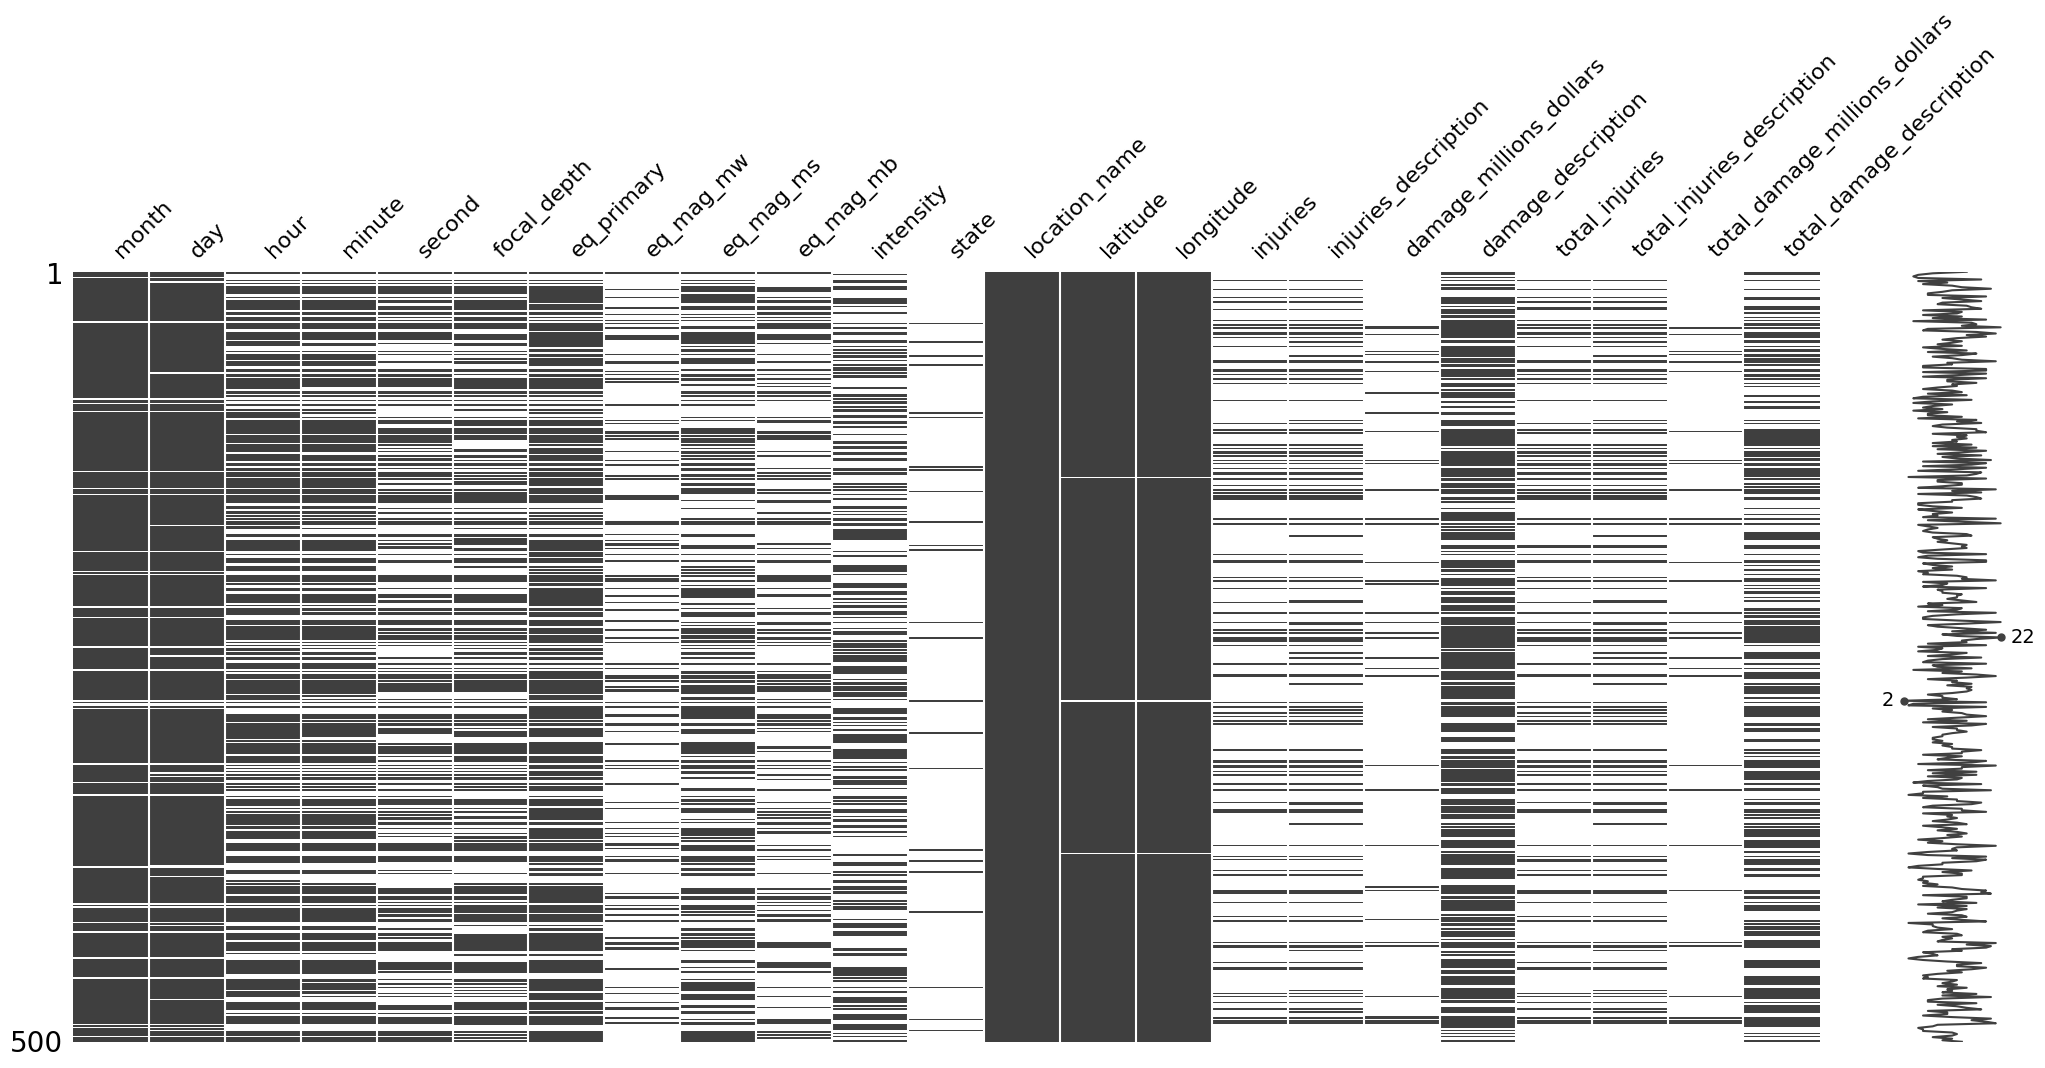

In [100]:
nullable_columns = data.columns[mask.any()].tolist()
msno.matrix(data[nullable_columns].sample(500))
plt.show()

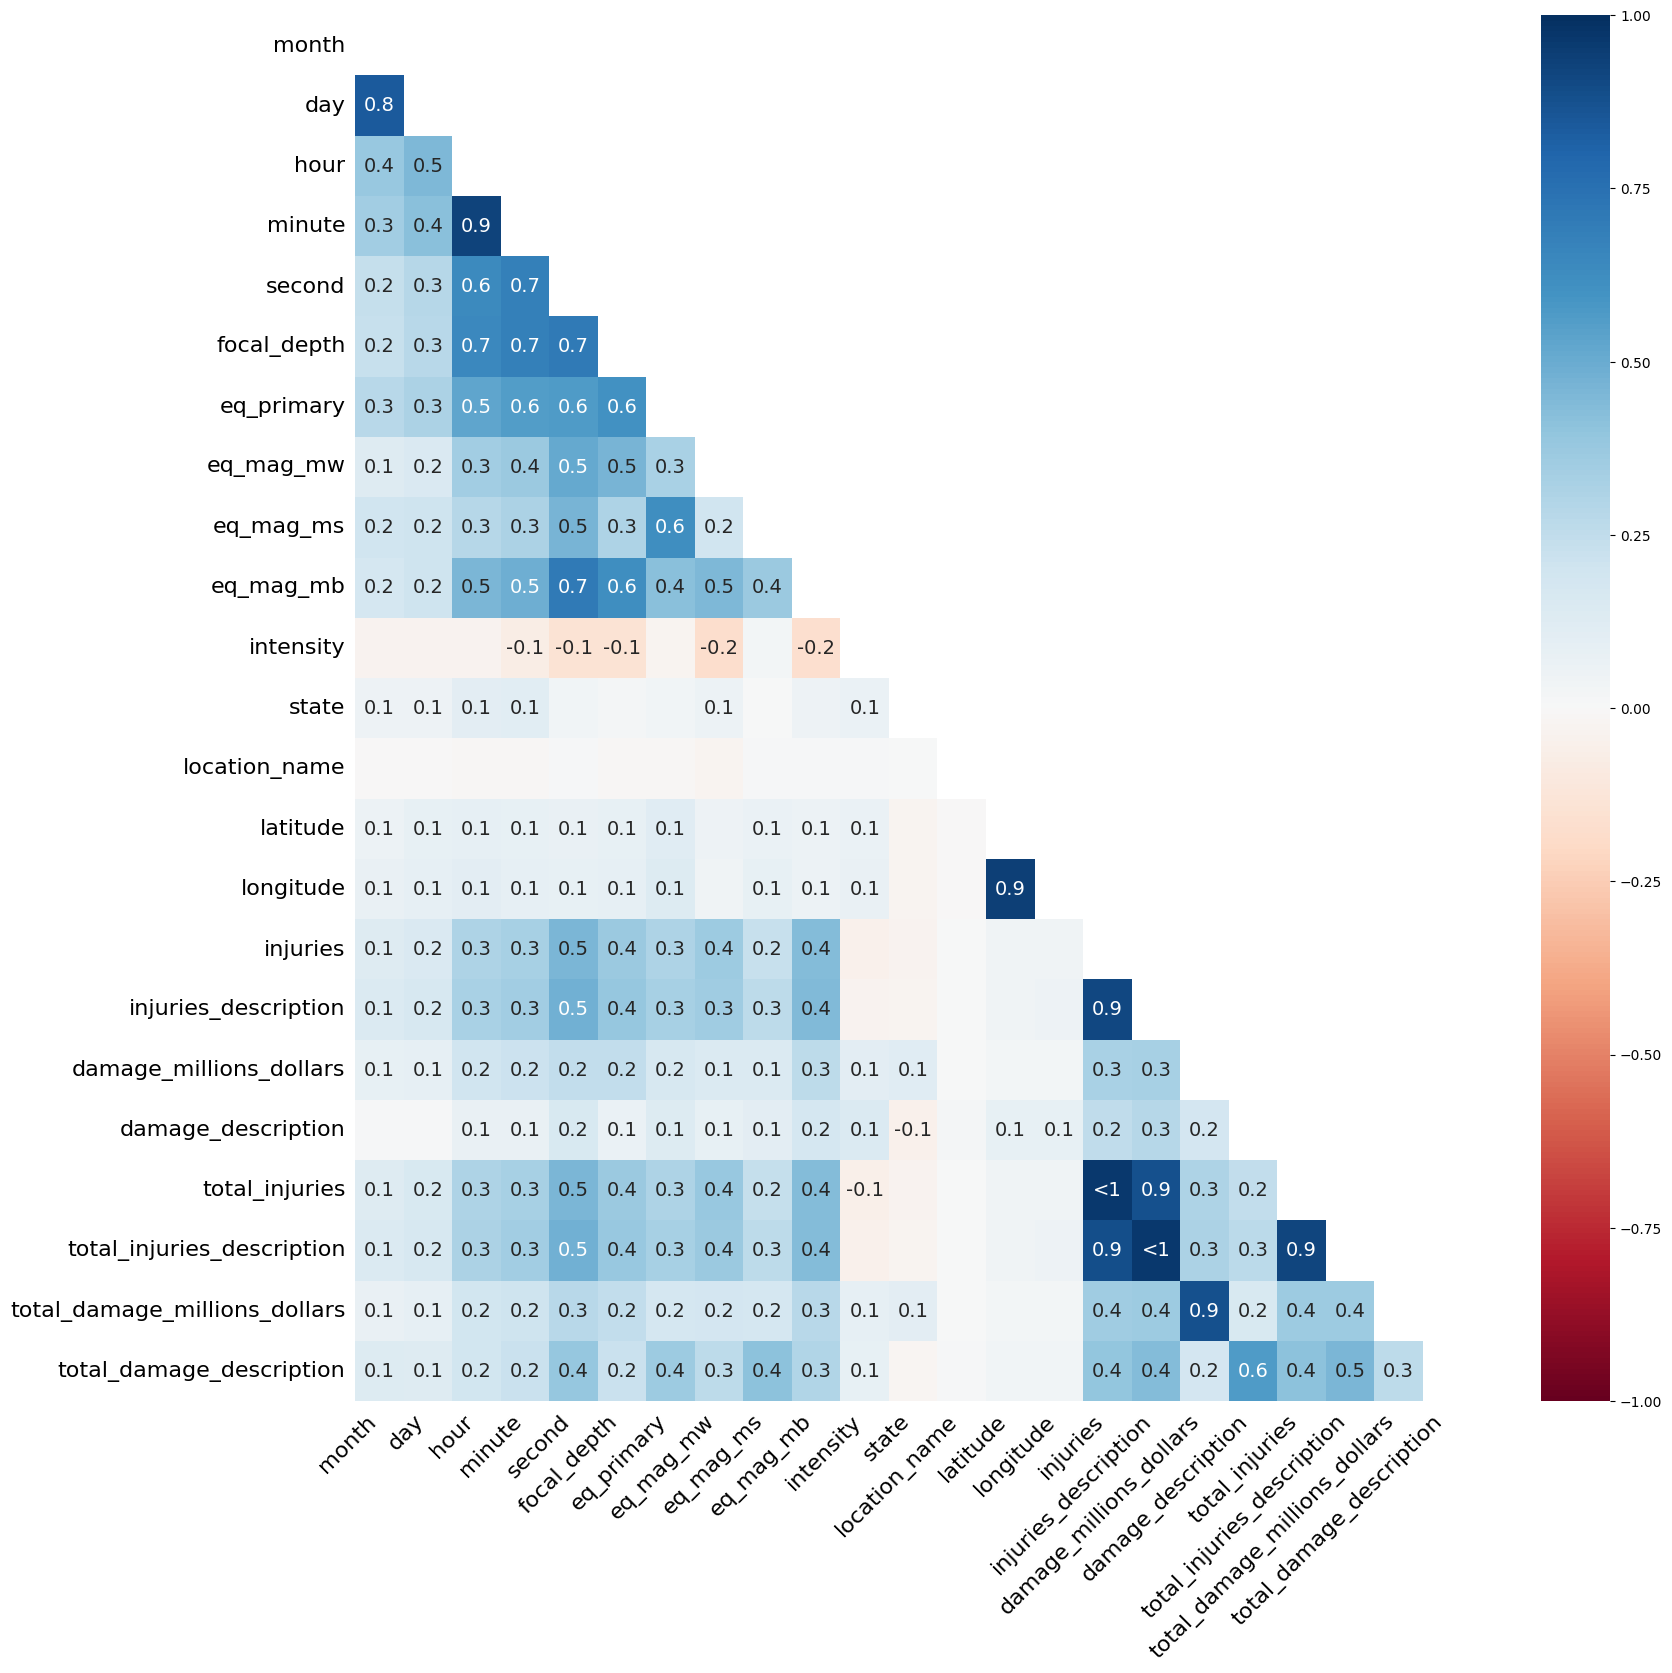

In [101]:
msno.heatmap(data[nullable_columns], figsize=(18,18))
plt.show()

In [102]:
time_features = ['month', 'day', 'hour', 'minute', 'second']

In [103]:
data[time_features] = data[time_features].fillna(0)

In [104]:
data

id flag_tsunami    year  month   day  hour  minute  second  \
0       338.0           No  1048.0    0.0   0.0   0.0     0.0     0.0   
1       771.0          Tsu  1580.0    4.0   6.0   0.0     0.0     0.0   
2      7889.0          Tsu  1757.0    7.0  15.0   0.0     0.0     0.0   
3      6697.0          Tsu  1500.0    0.0   0.0   0.0     0.0     0.0   
4      6013.0          Tsu  1668.0    4.0  13.0   0.0     0.0     0.0   
...       ...          ...     ...    ...   ...   ...     ...     ...   
6067   5360.0          Tsu  1993.0    8.0   8.0   8.0    34.0    24.9   
6068   5009.0           No  1983.0   12.0  22.0   1.0     2.0     2.4   
6069  10307.0           No  2018.0    2.0  25.0  17.0    44.0    43.0   
6070   5498.0           No  1998.0    7.0   9.0   5.0    19.0     7.3   
6071   5459.0           No  1997.0    4.0  22.0   9.0    31.0    23.2   

      focal_depth  eq_primary  ...  longitude  region_code  injuries  \
0             NaN         NaN  ...        NaN          120       NaN   
1            33.0         6.2  ...      1.309          120       NaN   
2             NaN         NaN  ...     -6.320          120       NaN   
3             NaN         NaN  ...        NaN          150       NaN   
4             NaN         NaN  ...    -71.050          150       NaN   
...           ...         ...  ...        ...          ...       ...   
6067         59.0         7.8  ...    144.801          170      48.0   
6068         26.0         6.4  ...    151.868          170       NaN   
6069         23.0         7.5  ...    142.768          170     300.0   
6070         10.0         6.2  ...    -28.626          130     100.0   
6071          5.0         6.7  ...    -60.892           90       2.0   

      injuries_description damage_millions_dollars damage_description  \
0                      NaN                     NaN                NaN   
1                      NaN                     NaN                  2   
2                      NaN                     NaN                NaN   
3                      NaN                     NaN                NaN   
4                      NaN                     NaN                NaN   
...                    ...                     ...                ...   
6067                     1                   250.0                  4   
6068                   NaN                    25.0                  4   
6069                     3                    61.0                  4   
6070                     2                    72.0                  4   
6071                     1                    25.0                  4   

     total_injuries  total_injuries_description  \
0               NaN                         NaN   
1               NaN                         NaN   
2               NaN                         NaN   
3               NaN                         NaN   
4               NaN                         NaN   
...             ...                         ...   
6067           48.0                           1   
6068            NaN                         NaN   
6069          300.0                           3   
6070          100.0                           2   
6071            2.0                           1   

      total_damage_millions_dollars total_damage_description  
0                               NaN                      NaN  
1                               NaN                      NaN  
2                               NaN                      NaN  
3                               NaN                      NaN  
4                               NaN                      NaN  
...                             ...                      ...  
6067                          250.0                        4  
6068                           25.0                        4  
6069                           61.0                        4  
6070                           72.0                        4  
6071                           25.0                        4  

[6072 rows x 28 column

In [105]:
data[time_features].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   6072 non-null   float64
 1   day     6072 non-null   float64
 2   hour    6072 non-null   float64
 3   minute  6072 non-null   float64
 4   second  6072 non-null   float64
dtypes: float64(5)
memory usage: 237.3 KB


In [106]:
description_features = [
 'injuries_description', 'damage_description',
 'total_injuries_description', 'total_damage_description'
]

In [107]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')

In [108]:
data[description_features] = imp.fit_transform(data[description_features])

In [109]:
data

id flag_tsunami    year  month   day  hour  minute  second  \
0       338.0           No  1048.0    0.0   0.0   0.0     0.0     0.0   
1       771.0          Tsu  1580.0    4.0   6.0   0.0     0.0     0.0   
2      7889.0          Tsu  1757.0    7.0  15.0   0.0     0.0     0.0   
3      6697.0          Tsu  1500.0    0.0   0.0   0.0     0.0     0.0   
4      6013.0          Tsu  1668.0    4.0  13.0   0.0     0.0     0.0   
...       ...          ...     ...    ...   ...   ...     ...     ...   
6067   5360.0          Tsu  1993.0    8.0   8.0   8.0    34.0    24.9   
6068   5009.0           No  1983.0   12.0  22.0   1.0     2.0     2.4   
6069  10307.0           No  2018.0    2.0  25.0  17.0    44.0    43.0   
6070   5498.0           No  1998.0    7.0   9.0   5.0    19.0     7.3   
6071   5459.0           No  1997.0    4.0  22.0   9.0    31.0    23.2   

      focal_depth  eq_primary  ...  longitude  region_code  injuries  \
0             NaN         NaN  ...        NaN          120       NaN   
1            33.0         6.2  ...      1.309          120       NaN   
2             NaN         NaN  ...     -6.320          120       NaN   
3             NaN         NaN  ...        NaN          150       NaN   
4             NaN         NaN  ...    -71.050          150       NaN   
...           ...         ...  ...        ...          ...       ...   
6067         59.0         7.8  ...    144.801          170      48.0   
6068         26.0         6.4  ...    151.868          170       NaN   
6069         23.0         7.5  ...    142.768          170     300.0   
6070         10.0         6.2  ...    -28.626          130     100.0   
6071          5.0         6.7  ...    -60.892           90       2.0   

      injuries_description damage_millions_dollars damage_description  \
0                       NA                     NaN                 NA   
1                       NA                     NaN                  2   
2                       NA                     NaN                 NA   
3                       NA                     NaN                 NA   
4                       NA                     NaN                 NA   
...                    ...                     ...                ...   
6067                     1                   250.0                  4   
6068                    NA                    25.0                  4   
6069                     3                    61.0                  4   
6070                     2                    72.0                  4   
6071                     1                    25.0                  4   

     total_injuries  total_injuries_description  \
0               NaN                          NA   
1               NaN                          NA   
2               NaN                          NA   
3               NaN                          NA   
4               NaN                          NA   
...             ...                         ...   
6067           48.0                           1   
6068            NaN                          NA   
6069          300.0                           3   
6070          100.0                           2   
6071            2.0                           1   

      total_damage_millions_dollars total_damage_description  
0                               NaN                       NA  
1                               NaN                       NA  
2                               NaN                       NA  
3                               NaN                       NA  
4                               NaN                       NA  
...                             ...                      ...  
6067                          250.0                        4  
6068                           25.0                        4  
6069                           61.0                        4  
6070                           72.0                        4  
6071                           25.0                        4  

[6072 rows x 28 column

In [110]:
data[description_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   injuries_description        6072 non-null   object
 1   damage_description          6072 non-null   object
 2   total_injuries_description  6072 non-null   object
 3   total_damage_description    6072 non-null   object
dtypes: object(4)
memory usage: 189.9+ KB


In [111]:
print(data[pd.isnull(data.damage_millions_dollars)].shape[0])
print(data[pd.isnull(data.damage_millions_dollars) & (data.damage_description != 'NA')].shape[0])

5594
3849


In [112]:
category_means = data[['damage_description', 'damage_millions_dollars']].groupby('damage_description').mean()
category_means

damage_millions_dollars
damage_description                         
1                                  0.417211
2                                  3.078840
3                                 13.818806
4                               3574.998799
NA                                      NaN

In [113]:
replacement_values = category_means.damage_millions_dollars.to_dict()
replacement_values['NA'] = -1
replacement_values['0'] = 0
replacement_values

{'1': 0.4172105263157895,
 '2': 3.0788402777777777,
 '3': 13.818805970149254,
 '4': 3574.9987991266376,
 'NA': -1,
 '0': 0}

In [114]:
imputed_values = data.damage_description.map(replacement_values)

In [115]:
data['damage_millions_dollars'] = np.where(data.damage_millions_dollars.isnull(),imputed_values,data.damage_millions_dollars)

In [116]:
data[['damage_millions_dollars']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   damage_millions_dollars  6072 non-null   float64
dtypes: float64(1)
memory usage: 47.6 KB


In [117]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

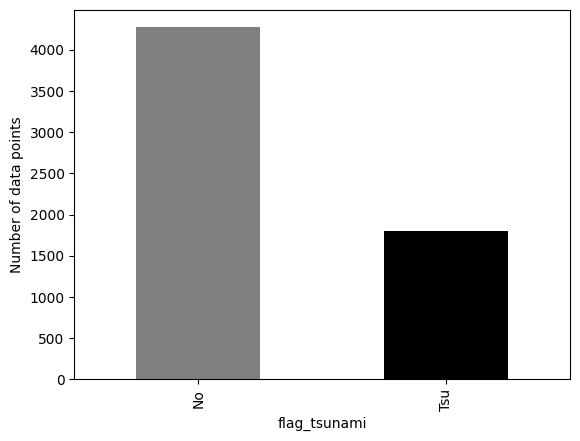

In [118]:
data.flag_tsunami.value_counts().plot(kind='bar', color = ('grey','black'))
plt.ylabel('Number of data points')
plt.xlabel('flag_tsunami')
plt.show()

In [119]:
numeric_variables = data.select_dtypes(include=[np.number])
numeric_variables.columns

Index(['id', 'year', 'month', 'day', 'hour', 'minute', 'second', 'focal_depth',
       'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity',
       'latitude', 'longitude', 'injuries', 'damage_millions_dollars',
       'total_injuries', 'total_damage_millions_dollars'],
      dtype='object')

In [120]:
object_variables = data.select_dtypes(include=[object])
object_variables.columns

Index(['flag_tsunami', 'country', 'state', 'location_name', 'region_code',
       'injuries_description', 'damage_description',
       'total_injuries_description', 'total_damage_description'],
      dtype='object')

In [121]:
numeric_variables.nunique().sort_values()

intensity                          11
month                              13
hour                               24
day                                32
eq_mag_mb                          47
eq_mag_mw                          54
eq_mag_ms                          55
minute                             60
eq_primary                         64
focal_depth                       197
total_damage_millions_dollars     233
damage_millions_dollars           248
injuries                          338
total_injuries                    344
second                            576
year                              946
latitude                         2885
longitude                        3654
id                               6072
dtype: int64

In [122]:
object_variables.nunique().sort_values()

flag_tsunami                     2
injuries_description             5
damage_description               5
total_injuries_description       5
total_damage_description         5
region_code                     18
state                           29
country                        155
location_name                 3821
dtype: int64

In [123]:
counts = data.injuries_description.value_counts(dropna=False)
counts

NA    4723
1      666
3      347
2      193
4      143
Name: injuries_description, dtype: int64

In [124]:
counts.reset_index().sort_values(by='index')

index  injuries_description
1     1                   666
3     2                   193
2     3                   347
4     4                   143
0    NA                  4723

In [125]:
counts = data.damage_description.value_counts()
counts = counts.sort_index()

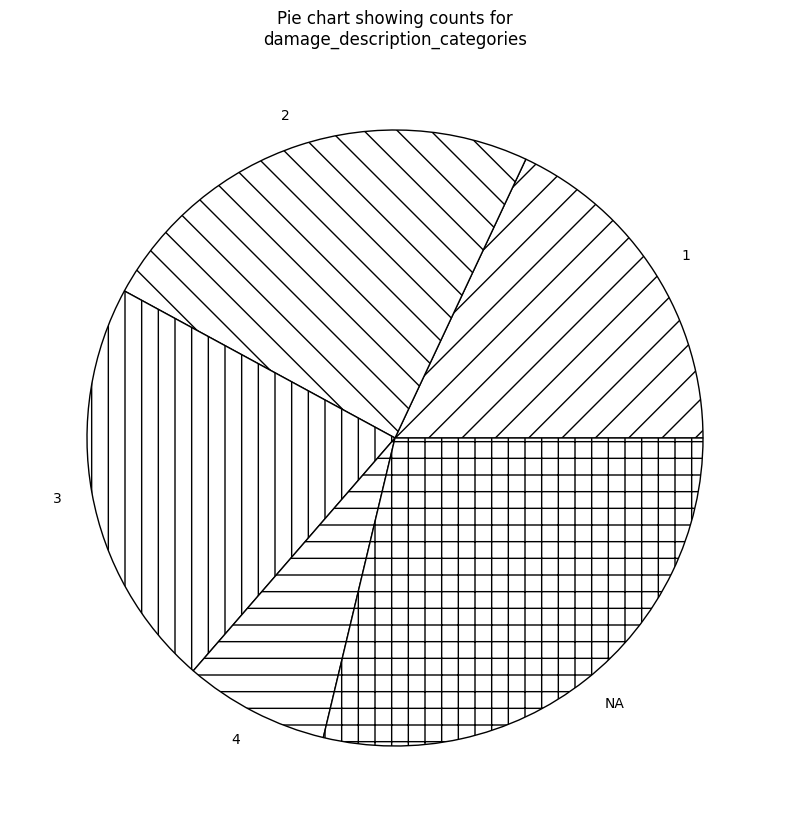

In [126]:
fig, ax = plt.subplots(figsize=(10,10))
slices = ax.pie(counts, 
 labels=counts.index, 
 colors = ['white'], 
 wedgeprops = {'edgecolor': 'black'} )
patches = slices[0]
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '\.', '*']
for patch in range(len(patches)):
 patches[patch].set_hatch(hatches[patch])
plt.title('Pie chart showing counts for\ndamage_description_categories')
plt.show()

In [127]:
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

C:\Users\hassan\AppData\Local\Temp\ipykernel_3328\2960140397.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.eq_primary.dropna(), bins=np.linspace(0,10,21))


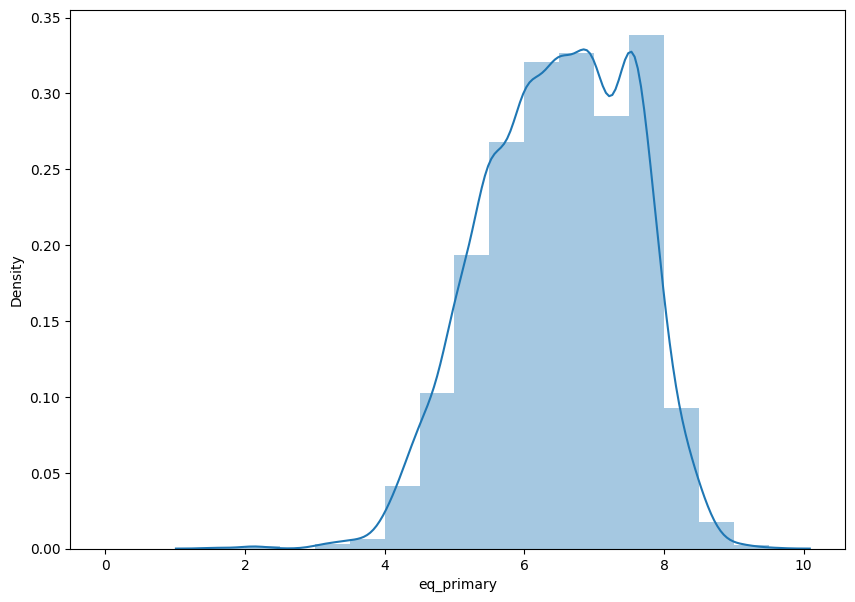

In [128]:
plt.figure(figsize=(10, 7))
sns.distplot(data.eq_primary.dropna(), bins=np.linspace(0,10,21))
plt.show()

In [129]:
data.skew().sort_values()

C:\Users\hassan\AppData\Local\Temp\ipykernel_3328\3072646498.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew().sort_values()


year                             -3.859655
latitude                         -1.038393
region_code                      -0.539048
longitude                        -0.457442
intensity                        -0.442065
eq_primary                       -0.295823
eq_mag_ms                        -0.243581
eq_mag_mb                        -0.058037
month                            -0.012936
day                               0.036121
eq_mag_mw                         0.154842
id                                0.300563
hour                              0.570365
minute                            0.618738
second                            1.096737
focal_depth                       5.866408
total_damage_millions_dollars    13.227907
total_injuries                   22.191856
injuries                         24.428284
damage_millions_dollars          47.532464
dtype: float64

In [130]:
data.kurt()

C:\Users\hassan\AppData\Local\Temp\ipykernel_3328\2907027414.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()


id                                 -0.866617
year                               19.532730
month                              -1.202962
day                                -1.228782
hour                               -1.132145
minute                             -1.050225
second                             -0.272400
focal_depth                        40.911649
eq_primary                         -0.327067
eq_mag_mw                          -0.593857
eq_mag_ms                          -0.486214
eq_mag_mb                           0.432798
intensity                           0.072622
latitude                            0.384692
longitude                          -0.777352
region_code                        -1.324200
injuries                          672.946635
damage_millions_dollars          2725.970362
total_injuries                    569.624067
total_damage_millions_dollars     202.895621
dtype: float64

In [131]:
data_to_plot = data[~pd.isnull(data.injuries) & ~pd.isnull(data.eq_primary)]

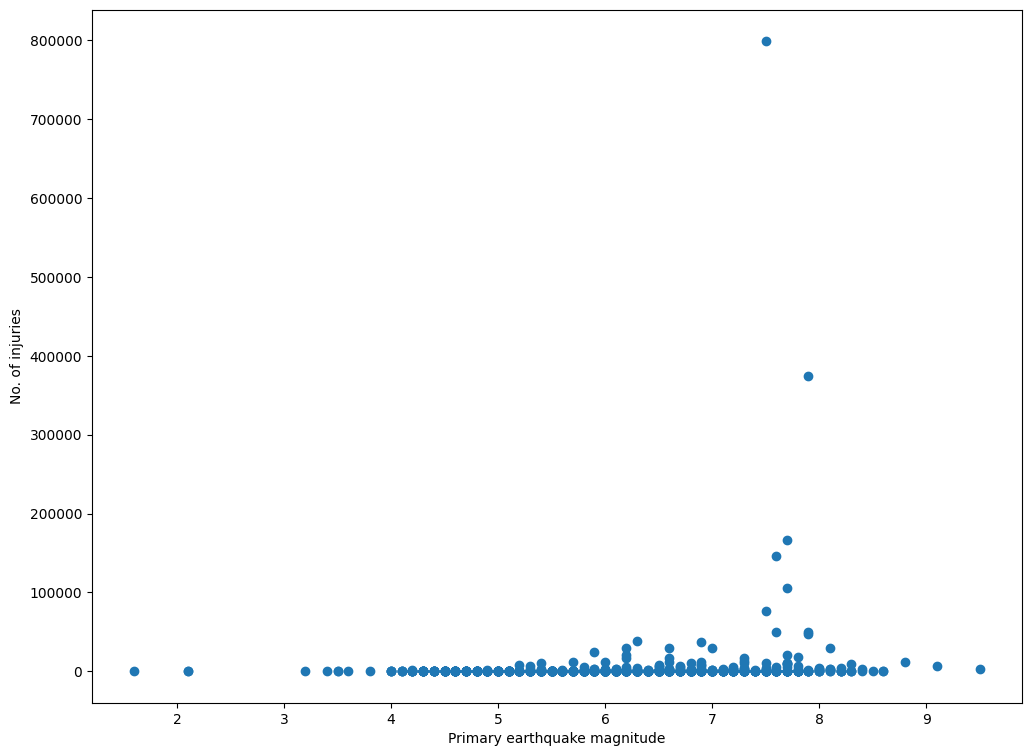

In [132]:
plt.figure(figsize=(12,9))
plt.scatter(x=data_to_plot.eq_primary, y=data_to_plot.injuries)
plt.xlabel('Primary earthquake magnitude')
plt.ylabel('No. of injuries')
plt.show()

C:\Users\hassan\AppData\Local\Temp\ipykernel_3328\3761766846.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), square=True, cmap="YlGnBu")


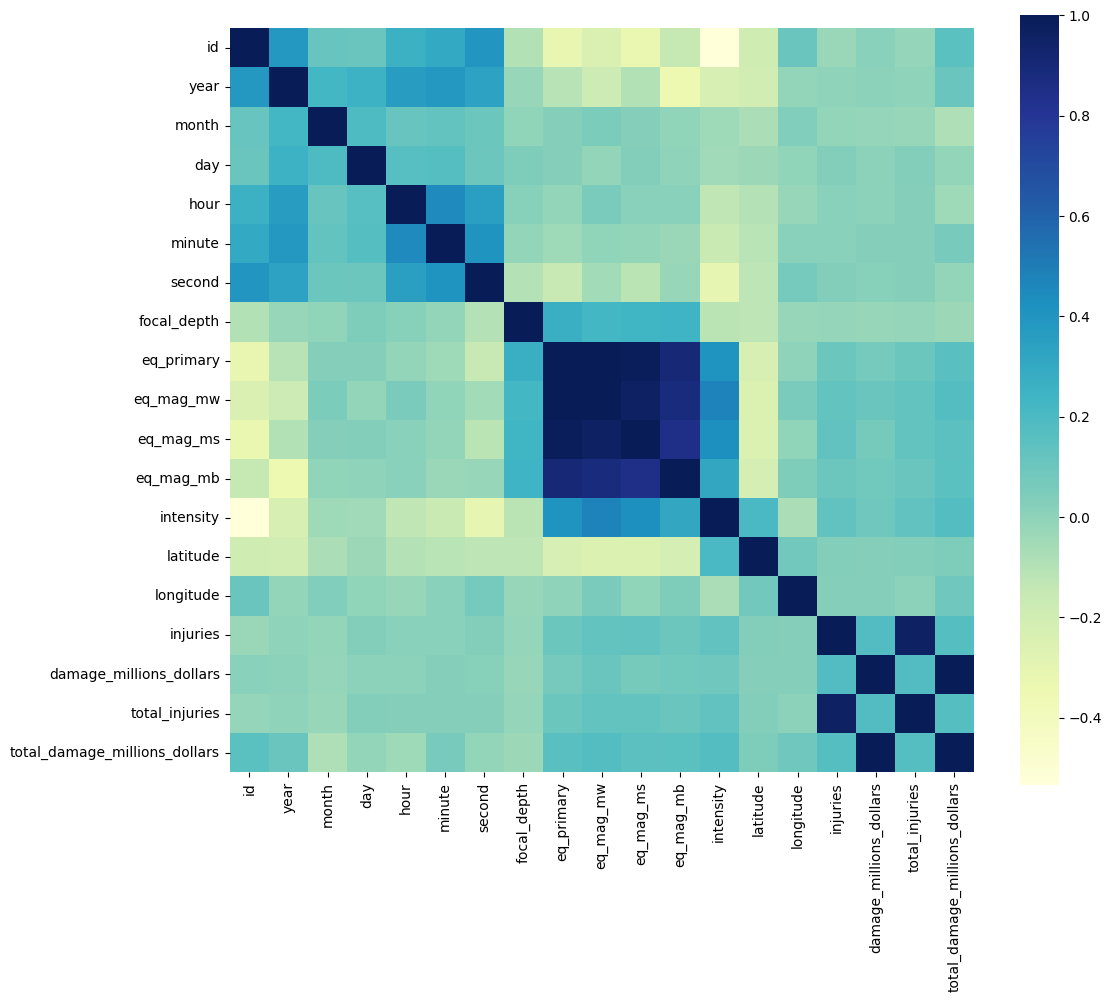

In [133]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), square=True, cmap="YlGnBu")
plt.show()

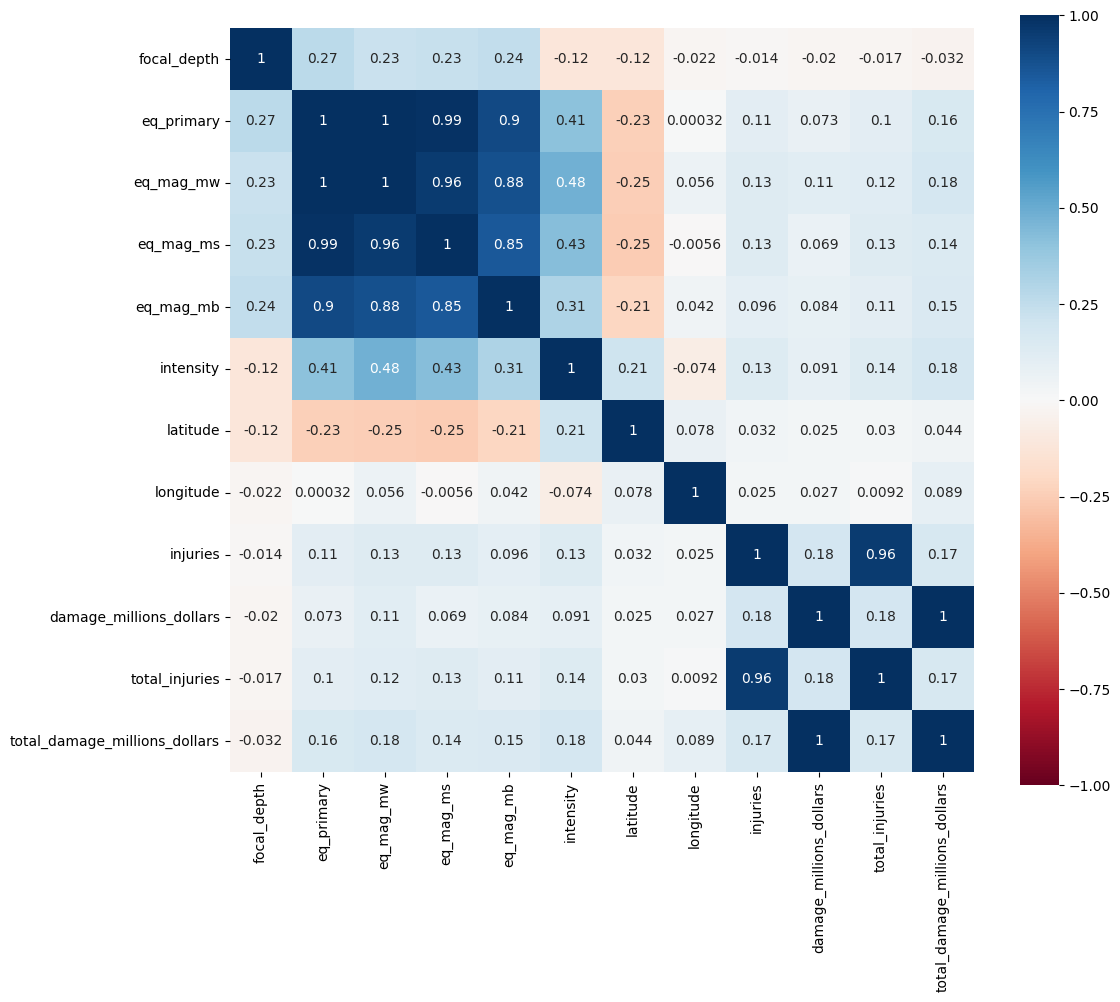

In [134]:
feature_subset = [
 'focal_depth', 'eq_primary', 'eq_mag_mw', 'eq_mag_ms','eq_mag_mb', 'intensity',
 'latitude', 'longitude', 'injuries', 'damage_millions_dollars',
 'total_injuries', 'total_damage_millions_dollars']
plt.figure(figsize = (12,10))
sns.heatmap(data[feature_subset].corr(), square=True, annot=True, 
cmap="RdBu", vmin=-1, vmax=1)
plt.show()

In [135]:
feature_subset = ['focal_depth', 'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity',]

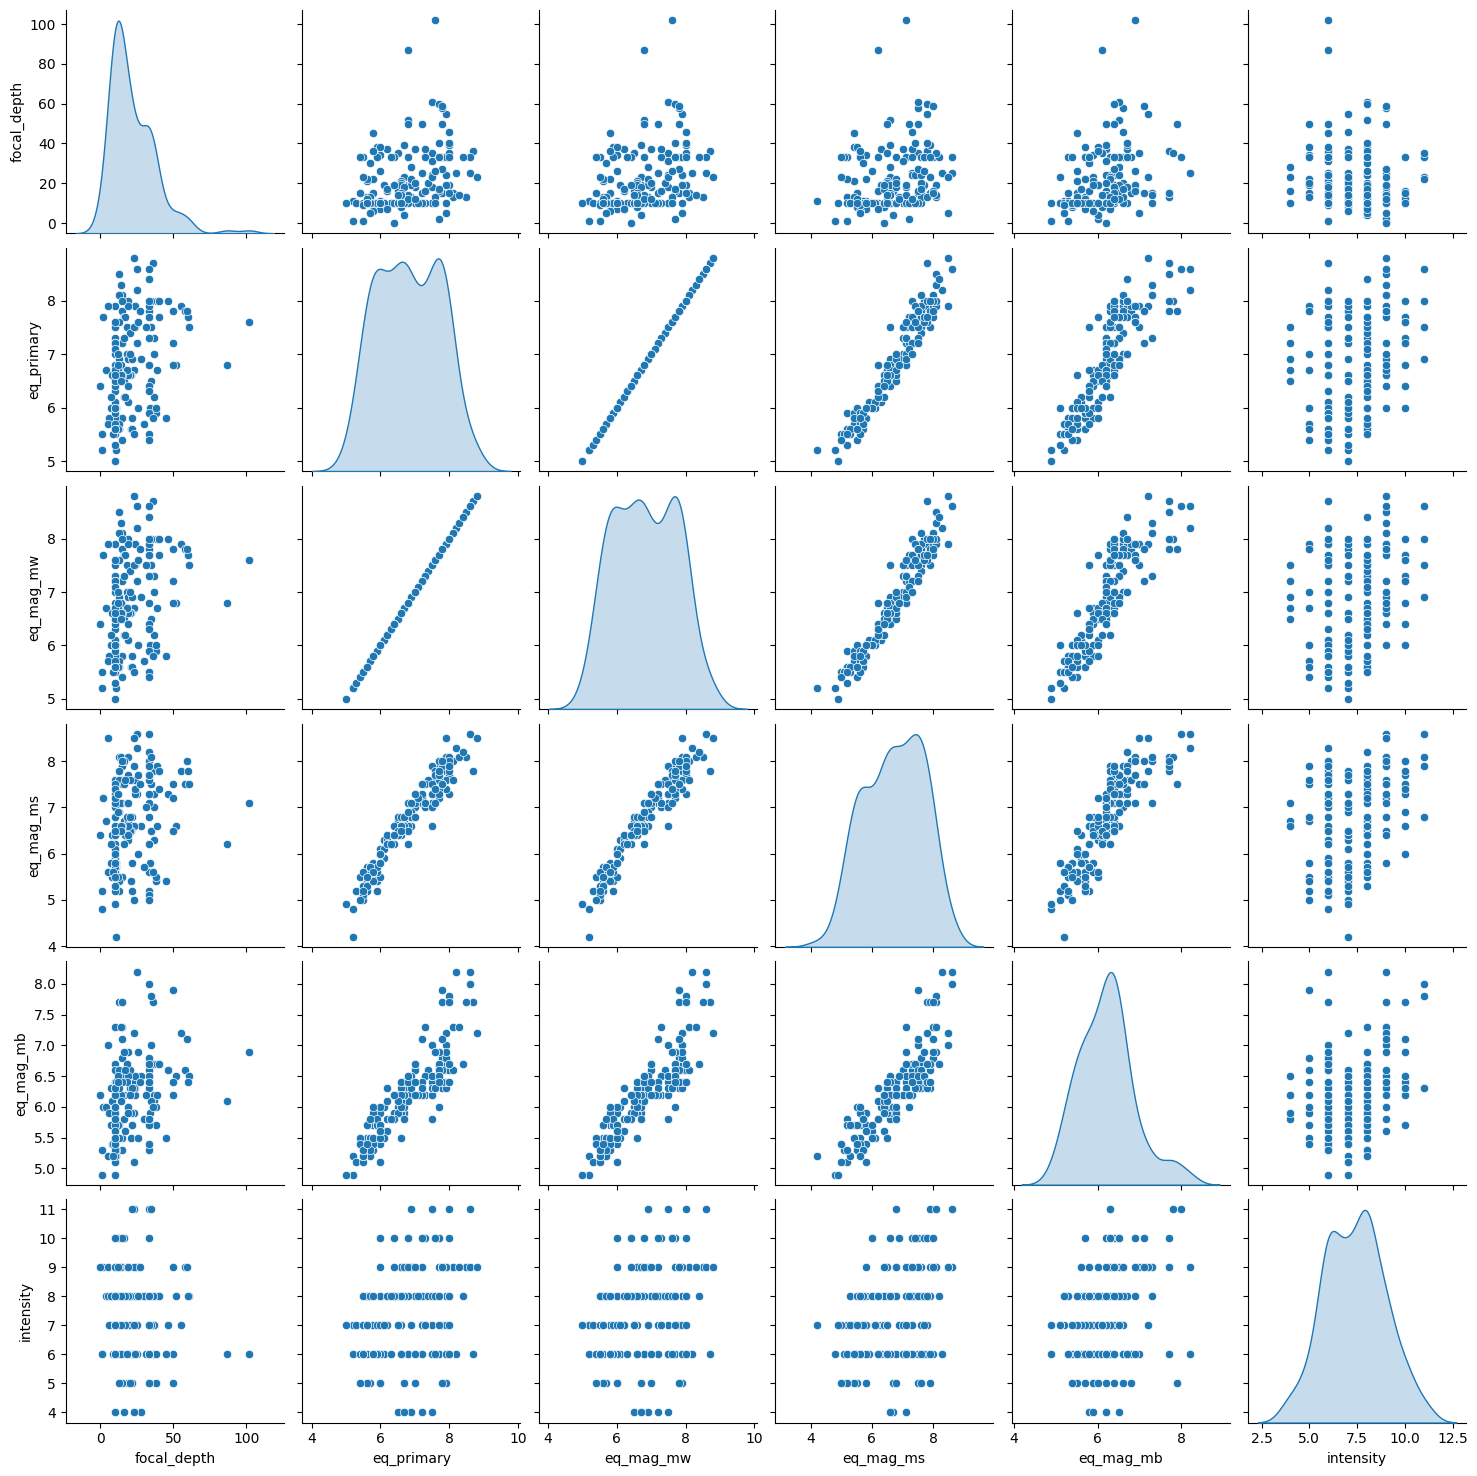

In [136]:
sns.pairplot(data[feature_subset].dropna(), kind ='scatter', diag_kind='kde')
plt.show()

In [137]:
data.loc[:,'flag_tsunami'] = data.flag_tsunami.apply(lambda t:int(str(t) == 'Tsu'))

C:\Users\hassan\AppData\Local\Temp\ipykernel_3328\142441493.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'flag_tsunami'] = data.flag_tsunami.apply(lambda t:int(str(t) == 'Tsu'))


In [138]:
subset = data[~pd.isnull(data.intensity)][['intensity','flag_tsunami']]

In [139]:
data_to_plot = subset.groupby('intensity').sum()
data_to_plot

flag_tsunami
intensity              
2.0                   0
3.0                   8
4.0                  19
5.0                  38
6.0                  63
7.0                  91
8.0                 119
9.0                 132
10.0                130
11.0                 58
12.0                  4

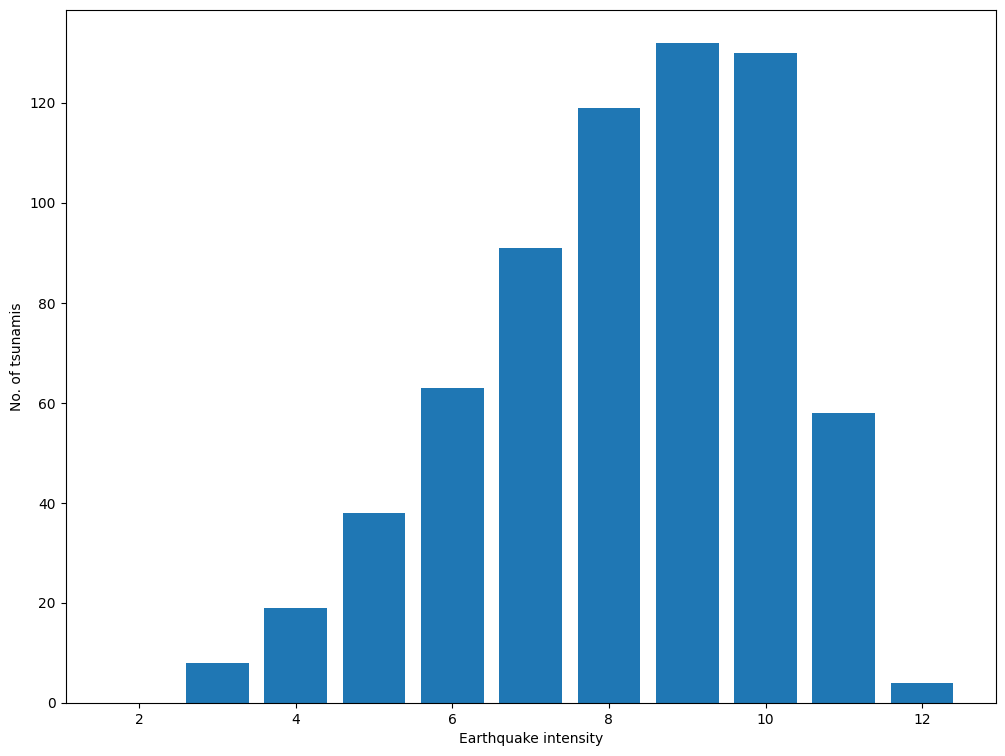

In [140]:
plt.figure(figsize=(12,9))
plt.bar(x=data_to_plot.index, height=data_to_plot.flag_tsunami)
plt.xlabel('Earthquake intensity')
plt.ylabel('No. of tsunamis')
plt.show()

In [141]:
country_counts = data.country.value_counts()
top_countries = country_counts[country_counts > 100]
top_countries

CHINA          590
JAPAN          403
INDONESIA      379
IRAN           377
ITALY          325
TURKEY         321
USA            260
GREECE         260
PHILIPPINES    210
MEXICO         198
CHILE          193
PERU           180
RUSSIA         149
Name: country, dtype: int64

In [142]:
subset = data[data.country.isin(top_countries.index)]

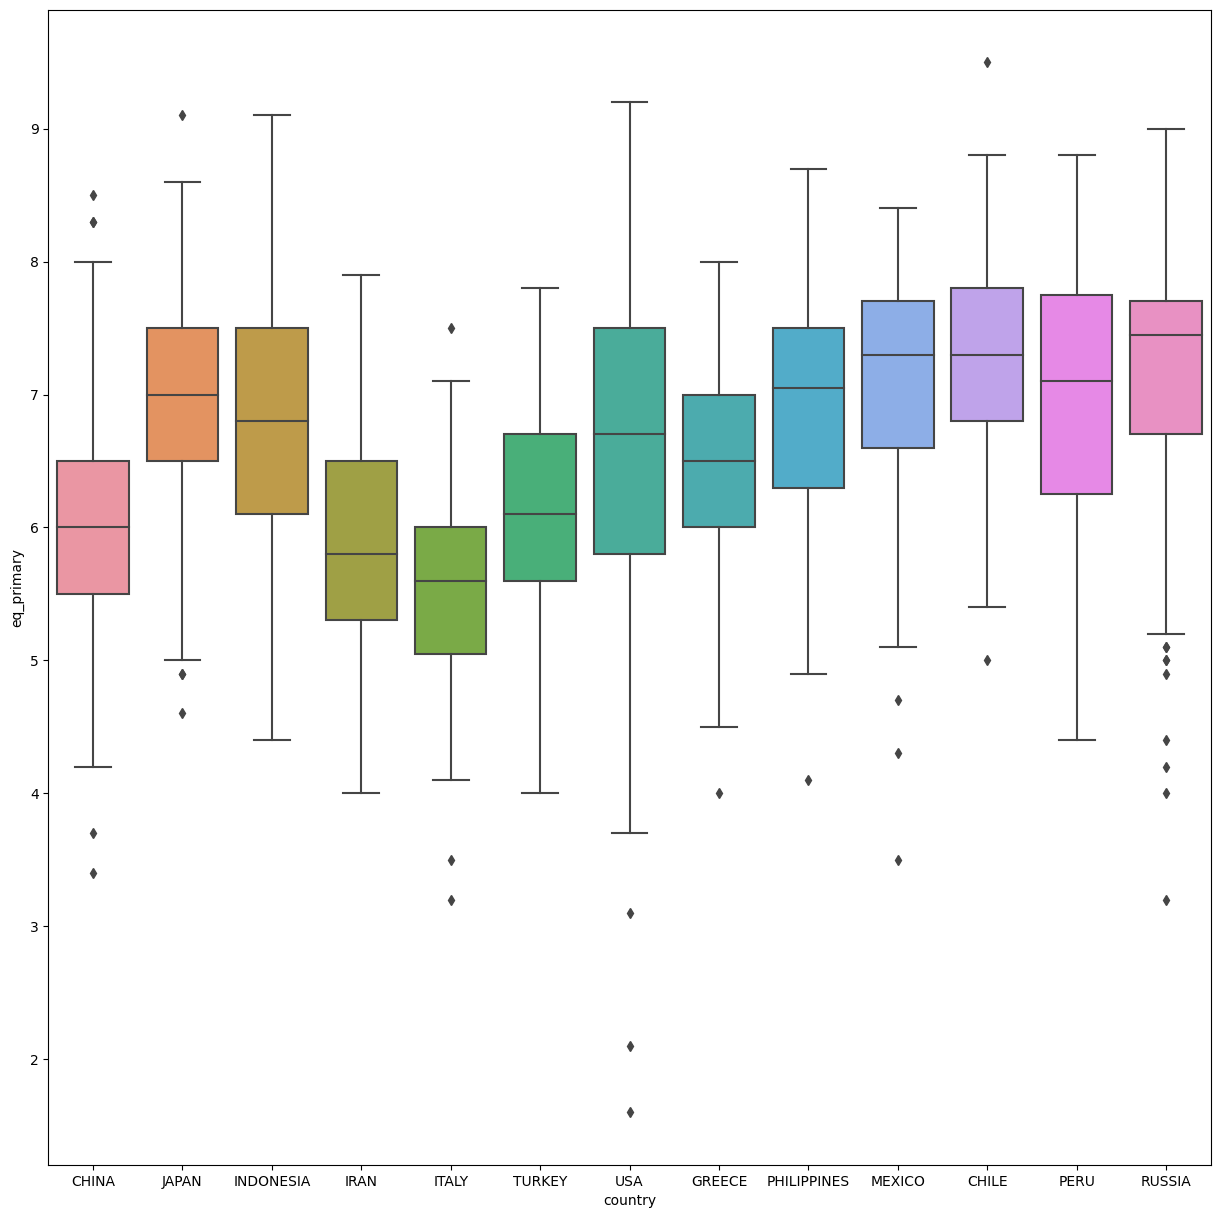

In [144]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='country', y="eq_primary", data=subset, order=top_countries.index)
plt.show()

In [145]:
grouped_data = data.groupby(['intensity', 'flag_tsunami']).size()
grouped_data

intensity  flag_tsunami
2.0        0                 5
3.0        0                10
           1                 8
4.0        0                37
           1                19
5.0        0                74
           1                38
6.0        0               151
           1                63
7.0        0               342
           1                91
8.0        0               470
           1               119
9.0        0               356
           1               132
10.0       0               494
           1               130
11.0       0                79
           1                58
12.0       0                68
           1                 4
dtype: int64

In [146]:
data_to_plot = grouped_data.unstack()
data_to_plot

flag_tsunami      0      1
intensity                 
2.0             5.0    NaN
3.0            10.0    8.0
4.0            37.0   19.0
5.0            74.0   38.0
6.0           151.0   63.0
7.0           342.0   91.0
8.0           470.0  119.0
9.0           356.0  132.0
10.0          494.0  130.0
11.0           79.0   58.0
12.0           68.0    4.0

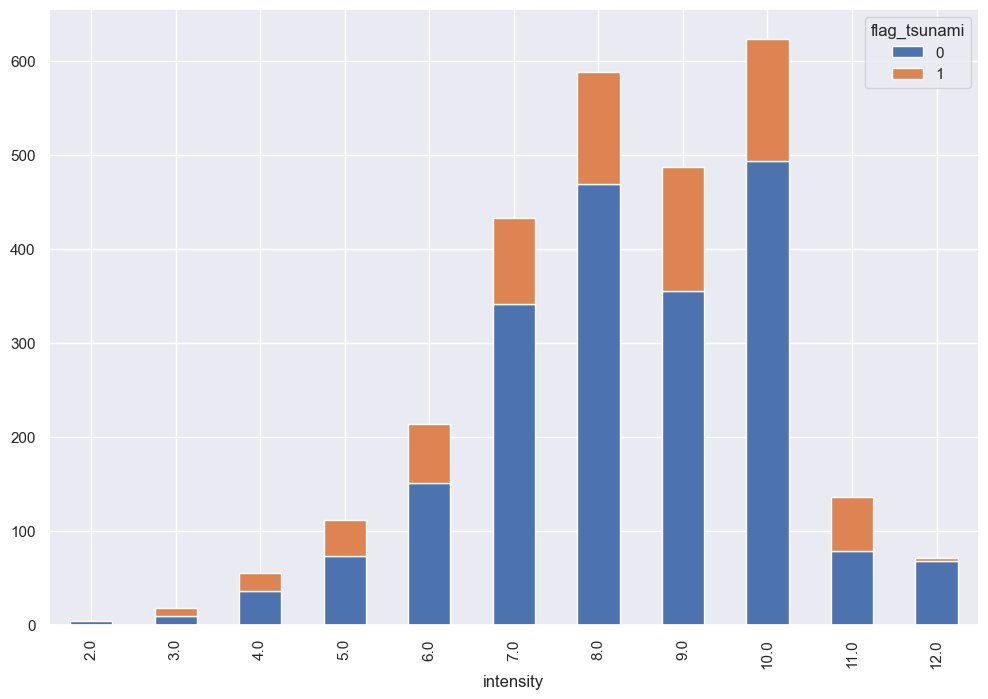

In [147]:
sns.set()
data_to_plot.plot(kind='bar', stacked=True, figsize=(12,8))
plt.show()